In [1]:
#% shift enter to run section
#% Place cursors where the split is desired, and then press and release ctrl + shift + -
#% Multiple cursors may be placed, by holding ctrl, and clicking the location for the cursor
#% Select the desired, consecutive cells, by holding shift, and clicking in the margin, where the [ ] is, which will highlight the selected cells.
#% While still holding shift, press m, and then release both keys.
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
import numpy as np
import numpy.ma as ma
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use('ggplot')
import xarray as xr
from glob import glob
import netCDF4
from netCDF4 import Dataset
import matplotlib.mlab as mlab
import pylab
import pyreadr
import seaborn as sns
import tqdm
import tzlocal
import sys
import os
import scipy.interpolate as sc
from scipy import signal
my_timezone = tzlocal.get_localzone().zone
# pylab for more MATLAB like environment and inline displays plots below cells
%pylab inline

# if gsw Warning shows, manually install gsw if possible - will still work without
import glidertools as gt
from cmocean import cm as cmo  # we use this for colormaps
#del()
import geostatspy.GSLIB as GSLIB 
import geostatspy.geostats as geostats 
import scipy.stats   
from skgstat import Variogram
import pykrige

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

from sklearn.linear_model import LinearRegression
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
readRDS = robjects.r['readRDS']

## Selecting seals for data analysis

In [2]:
SealIDS = np.array([1,2,4,5,13,14,15,16,17,18,19,20,21,22,23,24,25,31,47,49,50,51,52,53,57,58,62,63,64,65,66,67,68,69,70,109,110,112,113]).astype(int)
summer = [13,14,15,16,20,21,22,23,52,53,57,58,63,64,65,66,67,110,112,113]
West_summer = [21,22,52,53,57,58,63,64,65,66,67,113]
East_summer = [13,14,15,16,20,21,22,23,58,63,110,112]
West_mostly_summer = [52,53,57,58,63,64,65,66,67,113]
East_mostly__summer = [13,14,15,16,20,21,22,23,110,112]
winter = [1,2,4,5,17,18,19,24,25,31,47,49,50,51,62,68,69,70,109]
#West_winter = [1,2,5,17,18,19,24,25,31,109]
#East_winter = [4,5,25,31,50 #19 - many dives on east as well, 

In [24]:
dives_pdsi=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/dives_pdsi.rds')
dives_pdsi = pandas2ri.ri2py(dives_pdsi)

number = SealIDS[0]

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



#### Rough code for working wih netcdf files

In [178]:
# Rough code
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    print(number)
    #if sealID in winter
    if number in summer:
        if f==0:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            #flr_gridded_xds = flr_gridded_xds.expand_dims('sealID',2)
        #if f==1:
            #flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            #flr_gridded_xds = flr_gridded_xds.combine_first(flr_gridded_xds1)
            #flr_gridded_xds = np.concatenate(xr.broadcast(flr_gridded_xds,flr_gridded_xds1),axis=1)
            #flr_gridded_xds1 = flr_gridded_xds1.expand_dims('sealID',2)
            #flr_gridded_xds1 = flr_gridded_xds1[:,np.newaxis()]
            #flr_gridded_xds = xr.DataArray(flr_gridded_xds)
            #flr_gridded_xds = np.concatenate(xr.broadcast(flr_gridded_xds,flr_gridded_xds1),axis=2)
            #flr_gridded_xds = flr_gridded_xds.combine_first(flr_gridded_xds1)

        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            #flr_gridded_xds = flr_gridded_xds.combine_first(flr_gridded_xds1)
            #flr_gridded_xds = np.concatenate(xr.broadcast(flr_gridded_xds,flr_gridded_xds1),axis=1)
            #flr_gridded_xds1 = flr_gridded_xds1.expand_dims('sealID',2)
            #flr_gridded_xds = xr.DataArray(flr_gridded_xds)
            #flr_gridded_xds = np.concatenate((flr_gridded_xds,flr_gridded_xds1),axis=2)
            #flr_gridded_xds = flr_gridded_xds.combine_first(flr_gridded_xds1)
            flr_gridded_xds = np.hstack((flr_gridded_xds,flr_gridded_xds1))
            

    

1
2
4
5
13
14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52
53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113



#### West dives 

In [3]:
# Divesummary
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    print(number)
    #if sealID in winter
    if number in West_summer:
        if number==West_summer[0]:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            divessummary=pd.read_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/divessummary.csv')

            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds = flr_gridded_xds.rename({'Time': 'num'})
            flr_gridded_xds.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds=flr_gridded_xds.sel(num=divessummary.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            flr_gridded_xdsw = flr_gridded_xds.assign_coords(sealID=('num',sid))
            
        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            divessummary=pd.read_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/divessummary.csv')
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds1 = flr_gridded_xds1.rename({'Time': 'num'})
            flr_gridded_xds1.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds1=flr_gridded_xds1.sel(num=divessummary.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            flr_gridded_xds1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            
            flr_gridded_xdsw = xr.concat((flr_gridded_xdsw,flr_gridded_xds1),dim='num')

1
2
4
5
13
14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52


C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113



In [3]:
# dives_pdsi removed dives
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
dives_pdsi=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/dives_pdsi.rds')
dives_pdsi = pandas2ri.ri2py(dives_pdsi)
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    print(number)
    #if sealID in winter
    if number in West_summer:
        if number==West_summer[0]:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[dives_pdsi.sealID==str(number)]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds = flr_gridded_xds.rename({'Time': 'num'})
            flr_gridded_xds.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds=flr_gridded_xds.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            flr_gridded_xdsw = flr_gridded_xds.assign_coords(sealID=('num',sid))
            
        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[dives_pdsi.sealID==str(number)]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds1 = flr_gridded_xds1.rename({'Time': 'num'})
            flr_gridded_xds1.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds1=flr_gridded_xds1.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            flr_gridded_xds1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            
            flr_gridded_xdsw = xr.concat((flr_gridded_xdsw,flr_gridded_xds1),dim='num')

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



1
2
4
5
13
14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52
53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113



In [117]:
# dives_pdsi removed dives
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
dives_pdsi=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/dives_pdsi.rds')
dives_pdsi = pandas2ri.ri2py(dives_pdsi)
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    
    print(number)
    #if sealID in winter
    if number in summer:
        if (dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='West')].size>0) & (False if 'g' in dir() else True):
            g=1
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='West')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds = flr_gridded_xds.rename({'Time': 'num'})
            flr_gridded_xds.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds=flr_gridded_xds.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            yr = dives_.year.values
            flr_gridded_xdsw = flr_gridded_xds.assign_coords(sealID=('num',sid))
            flr_gridded_xdsw = flr_gridded_xdsw.assign_coords(year=('num',yr))
            
            
        if (dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='West')].size>0) & (True if 'g' in dir() else False):
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='West')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds1 = flr_gridded_xds1.rename({'Time': 'num'})
            flr_gridded_xds1.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds1=flr_gridded_xds1.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            yr = dives_.year.values
            flr_gridded_xdsw1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            flr_gridded_xdsw1 = flr_gridded_xdsw1.assign_coords(year=('num',yr))
            
            flr_gridded_xdsw = xr.concat((flr_gridded_xdsw,flr_gridded_xdsw1),dim='num')
del(g)

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



1
2
4
5
13
14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52
53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113


# Most recent West

In [163]:
# dives_pdsi removed dives with Time and num
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
#del(g)
#del(flr_gridded_xdsw)

diving=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/diving.rds')
diving = pandas2ri.ri2py(diving)
for f in tqdm_notebook(list(range(len(West_summer)))):
    number = West_summer[f]
    
    print(number)
    #if sealID in winter
    if number in summer:
        if f==0:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = diving[(diving.sealID==str(number)) & (diving.WE=='West')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
            
            Time = flr_gridded_xds.Time.astype('datetime64[s]').values
            flr_gridded_xds = flr_gridded_xds.assign_coords(num=('Time',bsm_seg_df.num.unique()))
            flr_gridded_xds = flr_gridded_xds.swap_dims({'Time': 'num'})

            flr_gridded_xds=flr_gridded_xds.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            yr = dives_.year.values.astype(int)
            lat = dives_.lat.values.astype(float)
            lon = dives_.lon.values.astype(float)
            flr_gridded_xdsw = flr_gridded_xds.assign_coords(sealID=('num',sid))
            flr_gridded_xdsw = flr_gridded_xdsw.assign_coords(year=('num',yr))
            flr_gridded_xdsw = flr_gridded_xdsw.assign_coords(lat=('num',lat))
            flr_gridded_xdsw = flr_gridded_xdsw.assign_coords(lon=('num',lon))
            
        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = diving[(diving.sealID==str(number)) & (diving.WE=='West')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
            
            Time = flr_gridded_xds1.Time.astype('datetime64[s]').values
            flr_gridded_xds1 = flr_gridded_xds1.assign_coords(num=('Time',bsm_seg_df.num.unique()))
            flr_gridded_xds1 = flr_gridded_xds1.swap_dims({'Time': 'num'})

            flr_gridded_xds1=flr_gridded_xds1.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            yr = dives_.year.values.astype(int)
            lat = dives_.lat.values.astype(float)
            lon = dives_.lon.values.astype(float)
            flr_gridded_xdsw1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            flr_gridded_xdsw1 = flr_gridded_xdsw1.assign_coords(year=('num',yr))
            flr_gridded_xdsw1 = flr_gridded_xdsw1.assign_coords(lat=('num',lat))
            flr_gridded_xdsw1 = flr_gridded_xdsw1.assign_coords(lon=('num',lon))
            
            flr_gridded_xdsw = xr.concat((flr_gridded_xdsw,flr_gridded_xdsw1),dim='num')

flr_gridded_xdsw.coords['Time'] = flr_gridded_xdsw.Time.astype('datetime64[s]')
flr_gridded_xdsw = flr_gridded_xdsw.swap_dims({'num': 'Time'})
#flr_gridded_xdse.Time.dt.month
#flr_gridded_xdse["Time.year"]
#flr_gridded_xdse["Time"].dt.season
#flr_gridded_xdse.groupby('Time.year','Time.month').mean()

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



21
22
52
53
57
58
63
64
65
66
67
113



In [164]:
flr_gridded_xdsw

<xarray.DataArray (depths: 200, Time: 36212)>
array([[5.95, 5.35,  nan, ...,  nan,  nan, 9.7 ],
       [5.95, 5.35,  nan, ...,  nan, 9.45, 9.7 ],
       [5.95, 5.35, 6.75, ...,  nan, 9.45, 9.7 ],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * depths   (depths) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * Time     (Time) datetime64[ns] 2012-03-02T15:11:00 2012-02-22T00:07:13 ...
    num      (Time) float64 3.215e+04 1.731e+04 32.0 52.0 54.0 56.0 58.0 ...
    sealID   (Time) int32 21 22 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 ...
    year     (Time) int32 2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
    lat      (Time) float64 -46.87 -47.52 -46.82 -46.82 -46.82 -46.82 -46.82 ...
    lon      (Time) float64 37.75 37.47 37.49 37.49 37.49 37.49 37.49 37.43 ...

In [165]:
np.apply_along_axis(axis=0,arr=flr_gridded_xdsw.groupby('sealID').count(axis=1),func1d=max)

array([   1,    1, 5233, 6045, 1087, 1802, 5231, 4665, 4416, 1252, 3698,
       2450])

In [166]:
%store flr_gridded_xdsw
#%store -r flr_gridded_xdsw

Stored 'flr_gridded_xdsw' (DataArray)


#### East dives

In [5]:
# Divesummary
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    print(number)
    #if sealID in winter
    if number in East_summer:
        if number==East_summer[0]:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            divessummary=pd.read_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/divessummary.csv')

            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds = flr_gridded_xds.rename({'Time': 'num'})
            flr_gridded_xds.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds=flr_gridded_xds.sel(num=divessummary.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            flr_gridded_xdse = flr_gridded_xds.assign_coords(sealID=('num',sid))
            
        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            divessummary=pd.read_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/divessummary.csv')
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds1 = flr_gridded_xds1.rename({'Time': 'num'})
            flr_gridded_xds1.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds1=flr_gridded_xds1.sel(num=divessummary.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            flr_gridded_xds1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            
            flr_gridded_xdse = xr.concat((flr_gridded_xdse,flr_gridded_xds1),dim='num')

1
2
4
5
13


C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52
53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113



In [5]:
# dives_pdsi removed dives
### East seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
dives_pdsi=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/dives_pdsi.rds')
dives_pdsi = pandas2ri.ri2py(dives_pdsi)
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    print(number)
    #if sealID in winter
    if number in East_summer:
        if number==East_summer[0]:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[dives_pdsi.sealID==str(number)]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds = flr_gridded_xds.rename({'Time': 'num'})
            flr_gridded_xds.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds=flr_gridded_xds.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            flr_gridded_xdse = flr_gridded_xds.assign_coords(sealID=('num',sid))
            
        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[dives_pdsi.sealID==str(number)]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds1 = flr_gridded_xds1.rename({'Time': 'num'})
            flr_gridded_xds1.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds1=flr_gridded_xds1.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            flr_gridded_xds1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            
            flr_gridded_xdse = xr.concat((flr_gridded_xdse,flr_gridded_xds1),dim='num')

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



1
2
4
5
13
14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52
53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113



In [123]:
# dives_pdsi removed dives
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
dives_pdsi=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/dives_pdsi.rds')
dives_pdsi = pandas2ri.ri2py(dives_pdsi)
for f in tqdm_notebook(list(range(len(SealIDS)))):
    number = SealIDS[f]
    
    print(number)
    #if sealID in winter
    if number in summer:
        if (dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='East')].size>0) & (False if 'g' in dir() else True):
            g=1
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='East')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds = flr_gridded_xds.rename({'Time': 'num'})
            flr_gridded_xds.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds=flr_gridded_xds.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            yr = dives_.year.values
            flr_gridded_xdse = flr_gridded_xds.assign_coords(sealID=('num',sid))
            flr_gridded_xdse = flr_gridded_xdse.assign_coords(year=('num',yr))
            
            
        if (dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='East')].size>0) & (True if 'g' in dir() else False):
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = dives_pdsi[(dives_pdsi.sealID==str(number)) & (dives_pdsi.WE=='East')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    
            flr_gridded_xds1 = flr_gridded_xds1.rename({'Time': 'num'})
            flr_gridded_xds1.coords['num'] = bsm_seg_df.num.unique()
            flr_gridded_xds1=flr_gridded_xds1.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            yr = dives_.year.values
            flr_gridded_xdse1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            flr_gridded_xdse1 = flr_gridded_xdse1.assign_coords(year=('num',yr))
            
            flr_gridded_xdse = xr.concat((flr_gridded_xdse,flr_gridded_xdse1),dim='num')
del(g)

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



1
2
4
5
13
14
15
16
17
18
19
20
21
22
23
24
25
31
47
49
50
51
52
53
57
58
62
63
64
65
66
67
68
69
70
109
110
112
113


# Most recent East

In [161]:
# dives_pdsi removed dives with Time and num
### West seals ### Should I use west dives rather using sealID and divenumber
# Each seal is read in and appended
#del(g)
#del(flr_gridded_xdsw)

diving=readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/diving.rds')
diving = pandas2ri.ri2py(diving)
for f in tqdm_notebook(list(range(len(East_summer)))):
    number = East_summer[f]
    
    print(number)
    #if sealID in winter
    if number in summer:
        if f==0:
            flr_gridded_xds = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = diving[(diving.sealID==str(number)) & (diving.WE=='East')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
            
            Time = flr_gridded_xds.Time.astype('datetime64[s]').values
            flr_gridded_xds = flr_gridded_xds.assign_coords(num=('Time',bsm_seg_df.num.unique()))
            flr_gridded_xds = flr_gridded_xds.swap_dims({'Time': 'num'})

            flr_gridded_xds=flr_gridded_xds.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds.num))
            yr = dives_.year.values.astype(int)
            lat = dives_.lat.values.astype(float)
            lon = dives_.lon.values.astype(float)
            flr_gridded_xdse = flr_gridded_xds.assign_coords(sealID=('num',sid))
            flr_gridded_xdse = flr_gridded_xdse.assign_coords(year=('num',yr))
            flr_gridded_xdse = flr_gridded_xdse.assign_coords(lat=('num',lat))
            flr_gridded_xdse = flr_gridded_xdse.assign_coords(lon=('num',lon))
            
        else:
            flr_gridded_xds1 = xr.open_dataarray('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')
            dives_ = diving[(diving.sealID==str(number)) & (diving.WE=='East')]
            bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
            bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
            
            Time = flr_gridded_xds1.Time.astype('datetime64[s]').values
            flr_gridded_xds1 = flr_gridded_xds1.assign_coords(num=('Time',bsm_seg_df.num.unique()))
            flr_gridded_xds1 = flr_gridded_xds1.swap_dims({'Time': 'num'})

            flr_gridded_xds1=flr_gridded_xds1.sel(num=dives_.num.values)
            sid = repeat(number,len(flr_gridded_xds1.num))
            yr = dives_.year.values.astype(int)
            lat = dives_.lat.values.astype(float)
            lon = dives_.lon.values.astype(float)
            flr_gridded_xdse1 = flr_gridded_xds1.assign_coords(sealID=('num',sid))
            flr_gridded_xdse1 = flr_gridded_xdse1.assign_coords(year=('num',yr))
            flr_gridded_xdse1 = flr_gridded_xdse1.assign_coords(lat=('num',lat))
            flr_gridded_xdse1 = flr_gridded_xdse1.assign_coords(lon=('num',lon))
            
            flr_gridded_xdse = xr.concat((flr_gridded_xdse,flr_gridded_xdse1),dim='num')

flr_gridded_xdse.coords['Time'] = flr_gridded_xdse.Time.astype('datetime64[s]')
flr_gridded_xdse = flr_gridded_xdse.swap_dims({'num': 'Time'})
#flr_gridded_xdse.Time.dt.month
#flr_gridded_xdse["Time.year"]
#flr_gridded_xdse["Time"].dt.season
#flr_gridded_xdse.groupby('Time.year','Time.month').mean()

C:\Users\Sean Evans\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



13
14
15
16
20
21
22
23
58
63
110
112



In [162]:
flr_gridded_xdse

<xarray.DataArray (depths: 200, Time: 46317)>
array([[6.65, 6.7 , 6.7 , ..., 7.75, 7.75, 7.8 ],
       [6.65, 6.7 , 6.7 , ..., 7.75, 7.75, 7.8 ],
       [6.65, 6.7 , 6.7 , ..., 7.75, 7.75, 7.8 ],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * depths   (depths) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * Time     (Time) datetime64[ns] 2011-01-04T18:11:05 2011-01-04T18:17:05 ...
    num      (Time) float64 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 32.0 ...
    sealID   (Time) int32 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 ...
    year     (Time) int32 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
    lat      (Time) float64 -46.92 -46.92 -46.92 -46.92 -46.92 -46.92 -46.92 ...
    lon      (Time) float64 38.43 38.43 38.43 38.43 38.43 38.43 38.43 38.43 ...

In [167]:
np.apply_along_axis(axis=0,arr=flr_gridded_xdse.groupby('sealID').count(axis=1),func1d=max)

array([5846, 4098, 2645, 3673, 1624, 7938, 4752, 7077,    5,   30, 3028,
       5601])

In [168]:
%store flr_gridded_xdse
#%store -r flr_gridded_xdse

Stored 'flr_gridded_xdse' (DataArray)


# Gridded temperature profiles

In [4]:
%store -r flr_gridded_xdsw
%store -r flr_gridded_xdse

## Choosing west or east

# Loop all plots

In [347]:
flr_gridded_xds = flr_gridded_xdse
WE = 'East'

#flr_gridded_xds = flr_gridded_xdse
#WE = 'East'

year=unique(flr_gridded_xds.year)[3]

midx = pd.MultiIndex.from_arrays([flr_gridded_xds.Time.values,flr_gridded_xds.num.values,flr_gridded_xds.sealID.values,flr_gridded_xds.year.values,flr_gridded_xds.lat.values,flr_gridded_xds.lon.values], names=("Time","num","sealID","year","lat","lon"))
flr_gridded_xds=xr.DataArray(flr_gridded_xds.values, [("depths", flr_gridded_xds.depths),("x", midx)])

flr_gridded_xds = flr_gridded_xds.sel(year=year)

mean_Tprof = np.apply_along_axis(axis=1,arr=flr_gridded_xds,func1d=np.nanmean)
std_Tprof = np.apply_along_axis(axis=1,arr=flr_gridded_xds,func1d=np.nanstd)
st_err_Tprof = std_Tprof/sqrt(len(flr_gridded_xds.num))
depths = flr_gridded_xds.depths.values

In [331]:
#West from r summary()
std_mld=std_mldw=32.2219
mean_mld=mean_mldw=87.72
y=yw=range(3,11,1)
# mean max.d for all dives
md=mdw=52.44
n=nw=len(flr_gridded_xds.num.values)
WE='West'
tx1=tx1w=8.5
tx2=tx2w=8.5
ty1=ty1w=-85
ty2=ty2w=-50

In [348]:
#unique(flr_gridded_xdsw.year)
unique(flr_gridded_xdse.year)

array([2011, 2012, 2013, 2015])

In [349]:
#East from r summary()
std_mld=std_mlde=17.267
mean_mld=mean_mlde=41.7
y=ye=range(3,11,1)  
# mean max.d for thermocline dives
md=mde=57.58
n=ne=len(flr_gridded_xds.num.values)
WE='East'
tx1=tx1w=8.5
tx2=tx2w=8.5
ty1=ty1w=-39
ty2=ty2w=-55

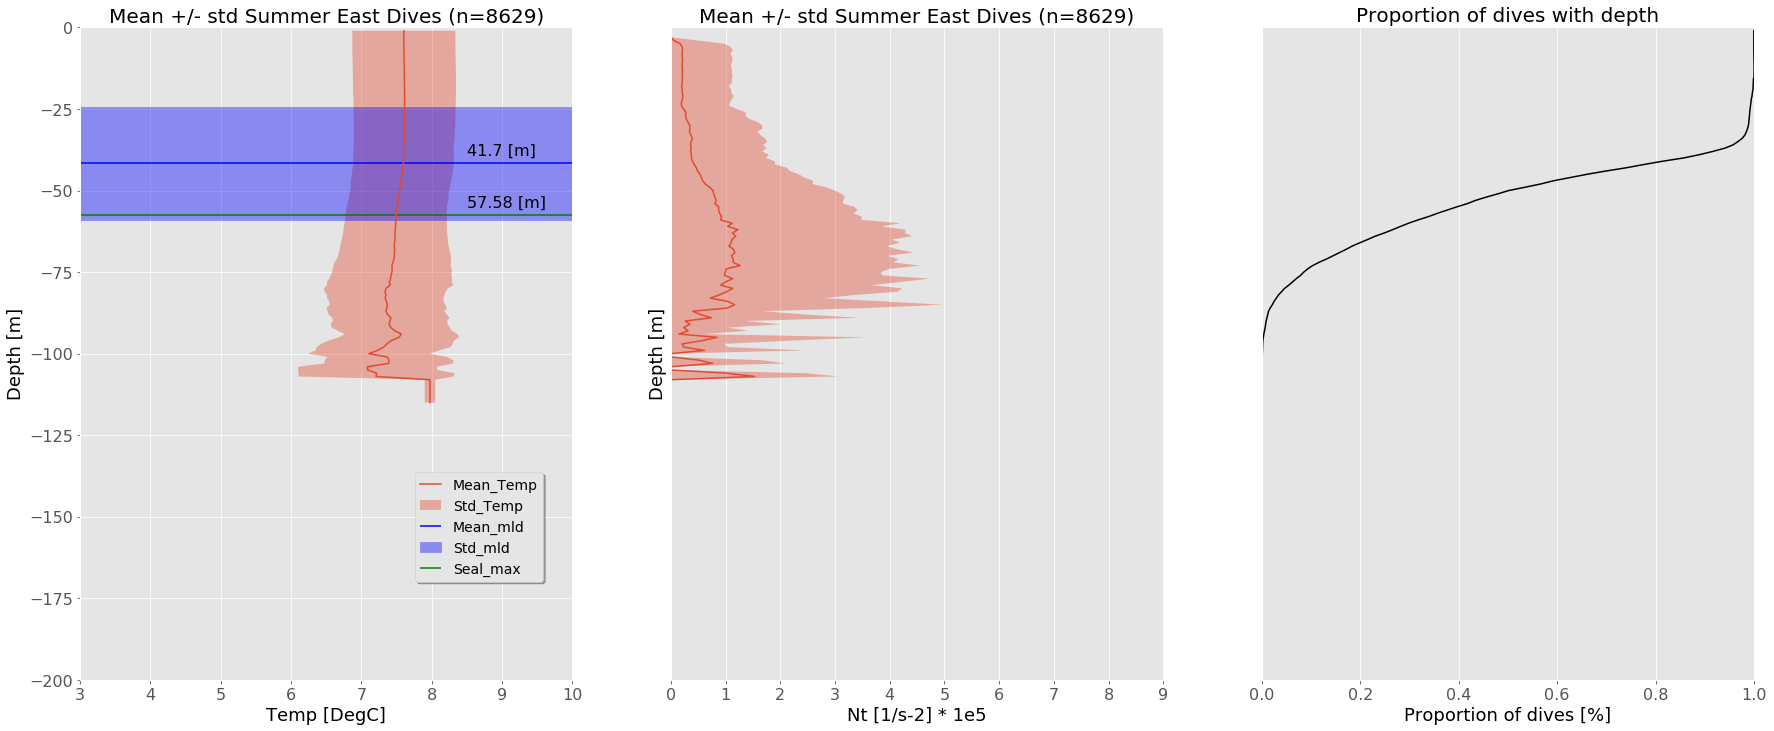

In [350]:
def count(var):
    count_along = []
    try:
        count=np.count_nonzero(~np.isnan(var))
        count_along += count,
    except:
        count_along += np.NaN,
        
    return np.array(count_along)

counts = np.apply_along_axis(arr=flr_gridded_xds,func1d=count,axis=1)

depths_ = np.array(depths,dtype=object).squeeze()
counts_ = np.array(counts,dtype=object).squeeze()

###############
#%% Nt Function
###############
    
def calc_N_sq(var):

    """Calculate Nt

    Args:
    var: Temperature 

    Return:
    Nt for each depth based on temperature difference

    Dependencies:
    numpy

    """
    import numpy as np
    Nt=[]
    Nt_mean = []

    try:
        T_diff = diff(var)/diff(dpt)
        nt = T_diff*(g*alpha)
        Nt += nt,
        Nt_mean = np.nanmean(nt)
    except:
        Nt += np.NaN,
        Nt_mean = np.NaN

    return np.array(Nt,Nt_mean)

    ###############
    #%% Executing Nt Function
    ###############

g = 9.8
alpha = -0.000125
dpt = flr_gridded_xds.depths.values
Nt = np.apply_along_axis(calc_N_sq,0,flr_gridded_xds)
Nt = Nt.squeeze()
    
Nt_xds = xr.DataArray(data=Nt,dims=["depths","num"],
    coords={"depths":arange(1,200,1),
    "num": flr_gridded_xds.num.values                                     
    })
Nt_xds = Nt_xds*1e5
#%% Saving Nt dataframe 
#Nt_xds.to_netcdf('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Nt_xds/'+str(number)+'_Nt_xds.nc')
mean_Nt_xds = np.apply_along_axis(axis=1,arr=abs(Nt_xds),func1d=np.nanmean)
std_Nt_xds = np.apply_along_axis(axis=1,arr=abs(Nt_xds),func1d=np.nanstd)
st_err_Nt_xds = std_Tprof/sqrt(len(abs(Nt_xds).num))
depthsN = Nt_xds.depths.values

fig, ax = plt.subplots(figsize=(30,12),ncols=3,nrows=1)

##### Mean Temp profile and mld
ax[0].plot(mean_Tprof, -depths, '-')
ax[0].fill_betweenx(-depths,mean_Tprof - std_Tprof, mean_Tprof + std_Tprof, alpha=0.4)
ax[0].hlines(-mean_mld, colors='blue', xmin=3, xmax=10)
ax[0].fill_between(y,-mean_mld - std_mld, -mean_mld + std_mld, alpha=0.4, color='blue')
ax[0].hlines(-md, colors='green', xmin=3, xmax=10)

ax[0].legend(('Mean_Temp', 'Std_Temp', 'Mean_mld','Std_mld','Seal_max'),
           shadow=True, loc=(0.68, 0.15), handlelength=1.5, fontsize=14)
#ax[0].set_xticklabels(fontsize=18) #fontsize=18, color='k'
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 16)
ax[0].set_xlabel('Temp [DegC]',fontsize=18, color='black')
ax[0].set_ylabel('Depth [m]',fontsize=18, color='black')
ax[0].set_title('Mean +/- std Summer '+WE+' Dives (n='+ str(n)+')',fontsize=20)
ax[0].set_ylim(-200,0)
ax[0].set_xlim(3,10)
ax[0].text(tx1,ty1,str(mean_mld)+' [m]',{'color': 'black', 'fontsize': 16})
ax[0].text(tx2,ty2,str(md)+' [m]',{'color': 'black', 'fontsize': 16})

##### Nt with depth
ax[1].plot(mean_Nt_xds, -depthsN, '-')
ax[1].fill_betweenx(-depthsN,mean_Nt_xds - std_Nt_xds, mean_Nt_xds + std_Nt_xds, alpha=0.4)
#ax.hlines(-mean_mlde, colors='blue')#, xmin=3, xmax=10
#ax.fill_between(ye,-mean_mlde - std_mlde, -mean_mlde + std_mlde, alpha=0.4, color='blue')
#ax.hlines(-mde, colors='green') #, xmin=3, xmax=10

#plt.legend(('Mean_Temp', 'Std_Temp', 'Mean_mld','Std_mld','Seal_max'),
#           shadow=True, loc=(0.68, 0.15), handlelength=1.5, fontsize=18)
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 16)
ax[1].set_yticks([]) #fontsize=18, color='k'
ax[1].set_xlabel('Nt [1/s-2] * 1e5',fontsize=18, color='black')
ax[1].set_ylabel('Depth [m]',fontsize=18, color='black')
ax[1].set_title('Mean +/- std Summer '+WE+' Dives (n='+ str(n)+')',fontsize=20)

ax[1].set_ylim(-200,0)
ax[1].set_xlim(0,9)

##### Counts
#ax[2].barh(-depths,counts_/counts_.max(),1, edgecolor='black', color='none',align='center') 
ax[2].plot(counts_/counts_.max(),-depths_,color='black') 

ax[2].set_ylim(-200,0)
#ax[2].set_xscale('log')
ax[2].set_xlim(0,1)
ax[2].tick_params(axis = 'both', which = 'major', labelsize = 16)
ax[2].set_yticks([]) #fontsize=18, color='k'

ax[2].set_title('Proportion of dives with depth',fontsize=20,)
ax[2].set_xlabel('Proportion of dives [%]',fontsize=18, color='black')
#ax[2].set_ylabel('Depth [m]',fontsize=18, color='black')

savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/All seals/Exploratory analysis/Tile mapping/Summer/New therm threshold (0.25)/'+WE+'_Summer_mld_'+str(year)+'.png')

## Calculating mean gridded Nt with depth

In [102]:
###############
#%% Nt Function
###############
    
def calc_N_sq(var):

    """Calculate Nt

    Args:
    var: Temperature 

    Return:
    Nt for each depth based on temperature difference

    Dependencies:
    numpy

    """
    import numpy as np
    Nt=[]
    Nt_mean = []

    try:
        T_diff = diff(var)/diff(dpt)
        nt = T_diff*(g*alpha)
        Nt += nt,
        Nt_mean = np.nanmean(nt)
    except:
        Nt += np.NaN,
        Nt_mean = np.NaN

    return np.array(Nt,Nt_mean)

    ###############
    #%% Executing Nt Function
    ###############

g = 9.8
alpha = -0.000125
dpt = flr_gridded_xds.depths.values
Nt = np.apply_along_axis(calc_N_sq,0,flr_gridded_xds)
Nt = Nt.squeeze()
    
Nt_xds = xr.DataArray(data=Nt,dims=["depths","num"],
    coords={"depths":arange(1,200,1),
    "num": flr_gridded_xds.num.values                                     
    })
Nt_xds = Nt_xds*1e5
#%% Saving Nt dataframe 
#Nt_xds.to_netcdf('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Nt_xds/'+str(number)+'_Nt_xds.nc')
mean_Nt_xds = np.apply_along_axis(axis=1,arr=abs(Nt_xds),func1d=np.nanmean)
std_Nt_xds = np.apply_along_axis(axis=1,arr=abs(Nt_xds),func1d=np.nanstd)
st_err_Nt_xds = std_Tprof/sqrt(len(abs(Nt_xds).num))
depthsN = Nt_xds.depths.values

In [103]:
mean_Nt_xds = np.apply_along_axis(axis=1,arr=abs(Nt_xds),func1d=np.nanmean)
std_Nt_xds = np.apply_along_axis(axis=1,arr=abs(Nt_xds),func1d=np.nanstd)
st_err_Nt_xds = std_Tprof/sqrt(len(abs(Nt_xds).num))
depthsN = Nt_xds.depths.values

ValueError: operands could not be broadcast together with shapes (200,) (199,) 

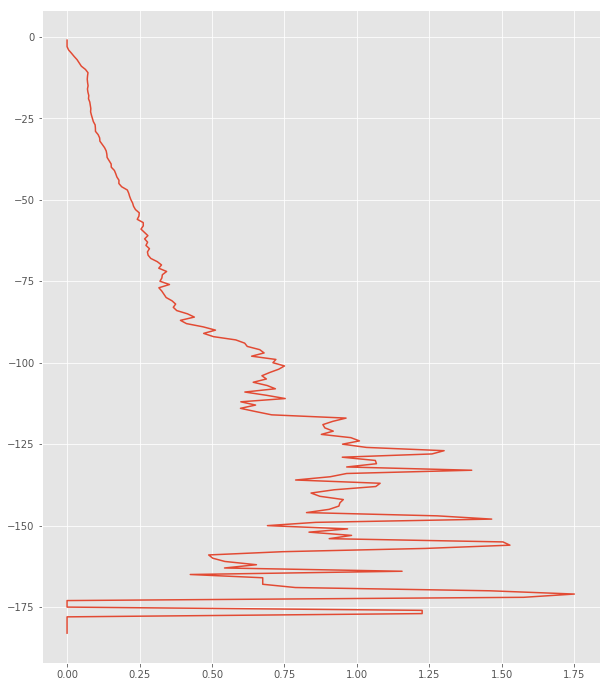

In [104]:
#East 
fig, ax = plt.subplots(figsize=(10,12))
ax.plot(mean_Nt_xds, -depthsN, '-')
ax.fill_betweenx(-depths,mean_Nt_xds - std_Nt_xds, mean_Nt_xds + std_Nt_xds, alpha=0.4)
#ax.hlines(-mean_mlde, colors='blue')#, xmin=3, xmax=10
#ax.fill_between(ye,-mean_mlde - std_mlde, -mean_mlde + std_mlde, alpha=0.4, color='blue')
#ax.hlines(-mde, colors='green') #, xmin=3, xmax=10

#plt.legend(('Mean_Temp', 'Std_Temp', 'Mean_mld','Std_mld','Seal_max'),
#           shadow=True, loc=(0.68, 0.15), handlelength=1.5, fontsize=18)
plt.xticks(fontsize=18, color='k')
plt.yticks(fontsize=18, color='k')
plt.xlabel('Nt [1/s-2] * 1e5',fontsize=18, color='black')
plt.ylabel('Depth [m]',fontsize=18, color='black')
plt.title('Mean +/- std Summer '+WE+' Dives (n='+ str(n)+')',fontsize=20)

plt.ylim(-200,0)
plt.xlim(0,9)
#plt.text(8.5,-39,str(mean_mlde)+' [m]',{'color': 'black', 'fontsize': 18})
#plt.text(8.5,-55,str(mde)+' [m]',{'color': 'black', 'fontsize': 18})

#savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/All seals/Exploratory analysis/Tile mapping/Summer/New therm threshold (0.25)/East_Summer_mld_.png')

### West

In [52]:
### West ###
###############
#%% Nt Function
###############
    
def calc_N_sq(var):

    """Calculate Nt

    Args:
    var: Temperature 

    Return:
    Nt for each depth based on temperature difference

    Dependencies:
    numpy

    """
    import numpy as np
    Nt=[]
    Nt_mean = []

    try:
        T_diff = diff(var)/diff(dpt)
        nt = T_diff*(g*alpha)
        Nt += nt,
        Nt_mean = np.nanmean(nt)
    except:
        Nt += np.NaN,
        Nt_mean = np.NaN

    return np.array(Nt,Nt_mean)

    ###############
    #%% Executing Nt Function
    ###############

g = 9.8
alpha = -0.000125
dpt = flr_gridded_xdsw.depths.values
Nt = np.apply_along_axis(calc_N_sq,0,flr_gridded_xdsw)
Nt = Nt.squeeze()
    
Nt_xdsw = xr.DataArray(data=Nt,dims=["depths","num"],
    coords={"depths":arange(1,200,1),
    "num": flr_gridded_xdsw.num.values                                     
    })
Nt_xdsw = Nt_xdsw*1e5
#%% Saving Nt dataframe 
#Nt_xds.to_netcdf('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Nt_xds/'+str(number)+'_Nt_xds.nc')

In [53]:
mean_Nt_xdsw = np.apply_along_axis(axis=1,arr=abs(Nt_xdsw),func1d=np.nanmean)
std_Nt_xdsw = np.apply_along_axis(axis=1,arr=abs(Nt_xdsw),func1d=np.nanstd)
st_err_Nt_xdsw = std_Tprofw/sqrt(len(abs(Nt_xdsw).num))
depthsw = Nt_xdsw.depths.values

(0, 9)

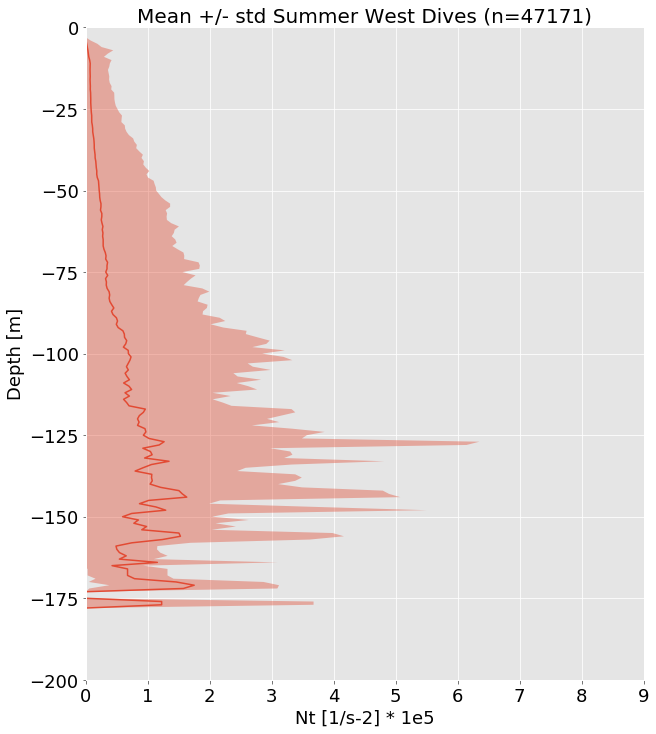

In [58]:
#West 
fig, ax = plt.subplots(figsize=(10,12))
ax.plot(mean_Nt_xdsw, -depthsw, '-')
ax.fill_betweenx(-depthsw,mean_Nt_xdsw - std_Nt_xdsw, mean_Nt_xdsw + std_Nt_xdsw, alpha=0.4)
#ax.hlines(-mean_mlde, colors='blue')#, xmin=3, xmax=10
#ax.fill_between(ye,-mean_mlde - std_mlde, -mean_mlde + std_mlde, alpha=0.4, color='blue')
#ax.hlines(-mde, colors='green') #, xmin=3, xmax=10

#plt.legend(('Mean_Temp', 'Std_Temp', 'Mean_mld','Std_mld','Seal_max'),
#           shadow=True, loc=(0.68, 0.15), handlelength=1.5, fontsize=18)
plt.xticks(fontsize=18, color='k')
plt.yticks(fontsize=18, color='k')
plt.xlabel('Nt [1/s-2] * 1e5',fontsize=18, color='black')
plt.ylabel('Depth [m]',fontsize=18, color='black')
plt.title('Mean +/- std Summer West Dives (n='+ str(ne)+')',fontsize=20,)
plt.ylim(-200,0)
plt.xlim(0,9)
#plt.text(8.5,-39,str(mean_mlde)+' [m]',{'color': 'black', 'fontsize': 18})
#plt.text(8.5,-55,str(mde)+' [m]',{'color': 'black', 'fontsize': 18})

#savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/All seals/Exploratory analysis/Tile mapping/Summer/New therm threshold (0.25)/East_Summer_mld_.png')

In [125]:
flr_gridded_xds.groupby('Time.month').mean(dim='Time')

<xarray.DataArray (depths: 200, month: 4)>
array([[6.612949, 6.536335, 7.084565, 5.772582],
       [6.609768, 6.535865, 7.087341, 5.750221],
       [6.605251, 6.53988 , 7.107551, 5.757271],
       ...,
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan]])
Coordinates:
  * depths   (depths) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * month    (month) int64 1 2 3 12